# Utilities

## Imports

In [48]:
#pip install pandas
#pip install numpy
#pip install -U scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

## Methods

### Euclidean distance

In [49]:
def distancia_euclidea(x, y):
    return np.sqrt(np.sum((x - y)**2))


### Next method paints al neighbors that are at the same distance between A and B  by using each point as a center of a circumference and the euclidean distance among them as the radius.

In [50]:
def visualizar_distancia(punto_a, punto_b, ver_radio = False):
    
    # Pintar los dos puntos
    plt.scatter(*punto_a, c='red', marker='o', label='A')
    plt.scatter(*punto_b, c='blue', marker='o', label='B')

    # Dibujar una línea entre los puntos
    plt.plot([punto_a[0], punto_b[0]], [punto_a[1], punto_b[1]], linestyle='--', color='gray')

    # Calcular la distancia euclídea
    distance = distancia_euclidea(punto_a, punto_b)

    # Calcular el ángulo de rotación de la línea para escribir el texto
    angle = np.arctan2((punto_b[1] - punto_a[1]), (punto_b[0] - punto_a[0])) * (180 / np.pi) 

    # Calcular el centro de la línea para escribir el texto
    midpoint = [(punto_a[0] + punto_b[0]) / 2, (punto_a[1] + punto_b[1]) / 2] 

    # Escribir la distancia entre los dos puntos
    plt.text(midpoint[0], midpoint[1], f'Distancia: {distance:.2f}', ha='center', va='bottom', rotation=angle)

    if ver_radio:

        # Añadir círculos con la distancia euclídea
        circle = plt.Circle(punto_a, # centro
                            distance, # radio
                            fill=False, linestyle='dotted', edgecolor='red')
        plt.gca().add_patch(circle)
        circle = plt.Circle(punto_b, # centro
                            distance, # radio
                            fill=False, linestyle='dotted', edgecolor='blue')
        plt.gca().add_patch(circle)

    plt.title('Distancia euclídea')
    plt.xlabel('Variable1')
    plt.ylabel('Variable2')
    
    plt.xlim(0,1) # rango eje x
    plt.ylim(0,1) # rango eje y
    
    # Hacer los ejes en la misma magnitud
    plt.gca().set_aspect('equal', adjustable='box')
    
    # Sacar la leyenda de la caja principal
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

# visualizar_distancia(punto_a, punto_b)
# visualizar_distancia(punto_a, punto_b, ver_radio = True)



### Next method shows the k nearest neighbors only.

In [51]:

# Counter proporciona un diccionario donde cada elemento distinto se almacena 
# como claves con un valor asociado igual a su cuenta
from collections import Counter

def visualizar_vecinos(X_train, y_train, dato_nuevo, indices_vecinos, clase):

    # Mostrar conjunto de entrenamiento
    plt.scatter(X_train[:, 0], 
                X_train[:, 1],
                c=y_train, 
                edgecolors='k', marker='o', s=100, label='Training')

    # Resaltar los vecinos más cercanos del punto
    plt.scatter(X_train[indices_vecinos, 0], 
                X_train[indices_vecinos, 1], 
                facecolors='none', 
                edgecolors='red', # rodear en rojo
                linewidths=2, 
                s=100, 
                label='Vecinos más cercanos')

    # Mostrar el nuevo dato que queremos clasficar
    plt.scatter(dato_nuevo[0], 
                dato_nuevo[1], 
                c=clase, 
                vmin=0, vmax=1,
                marker='x', s=200, label='Test Point')

    plt.title('Vecinos más cercanos de {}'.format(np.round(dato_nuevo, 2)))
    plt.xlabel('Variable1')
    plt.ylabel('Variable2')
    
    plt.gca().set_aspect('equal', adjustable='box')

    plt.show()

# Recibe un conjunto de datos de entrenamiento junto con sus etiquetas reales, el nuevo dato que queremos clasificar y el número de vecinos que seleccionamos para hacerlo
def clasificar_dato_usando_knn(X_train, y_train, dato_nuevo, k=3):

    # Obtener todas las distancias
    distances = [distancia_euclidea(dato_nuevo, x_train) for x_train in X_train]

    # Seleccionar los objetos k más cercanos
    k_indices = np.argsort(distances)[:k]

    # Asignar las etiquetas
    k_nearest_labels = [y_train[i] for i in k_indices]

    # Seleccionar la clase a la que se asigna, 
    # que es la etiqueta más común entre los vecinos más cercanos
    most_common = Counter(k_nearest_labels).most_common(1)

    # Visualizar la iteración
    visualizar_vecinos(X_train, y_train, dato_nuevo, k_indices, most_common[0][0])

    # Devolver la clase
    return most_common[0][0]

# Realizamos la clasificación para todos los datos del conjunto de test
def aplicar_kNN_datos_nuevos(X_test, X_train, y_train, k=3):
    
    # Crear un array inicialmente vacío para almacenar las classes en cada iteración
    predicted_labels = np.empty(X_test.shape[0], dtype=int)

    # Clasficar cada punto del conjunto de test
    for i, x_test in enumerate(X_test):
        predicted_labels[i] = clasificar_dato_usando_knn(X_train, y_train, x_test, k)

    # Almacenar para cada objeto la clase que se le ha asignado
    df = pd.DataFrame(X_test)
    df['pred_class'] = predicted_labels

    return df


# K NEAREST NEIGHBORS ALGORITHM

### Using pandas


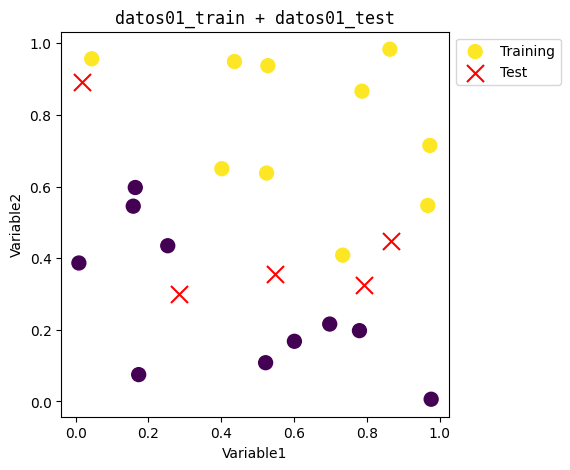

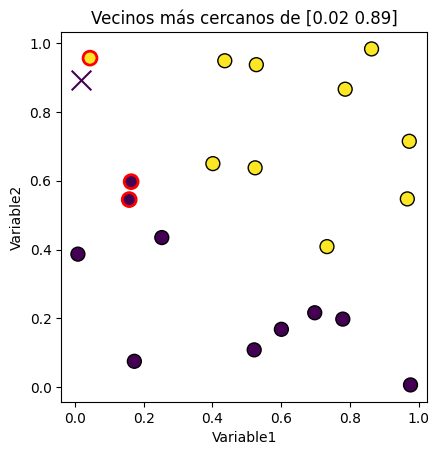

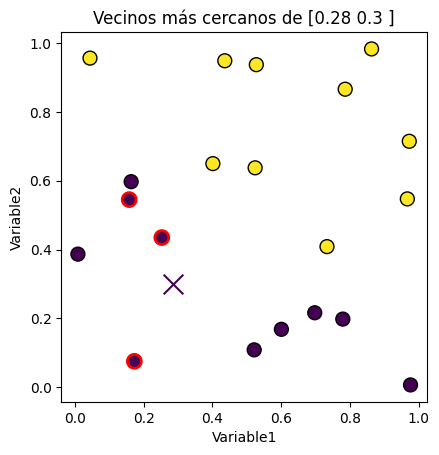

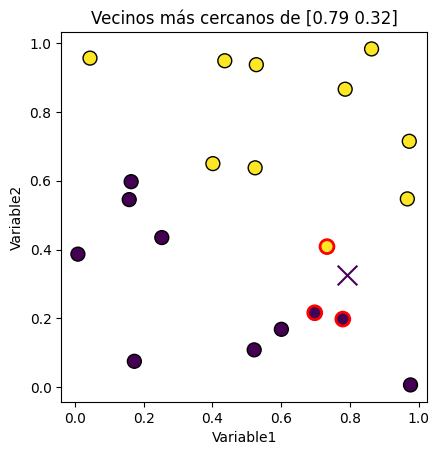

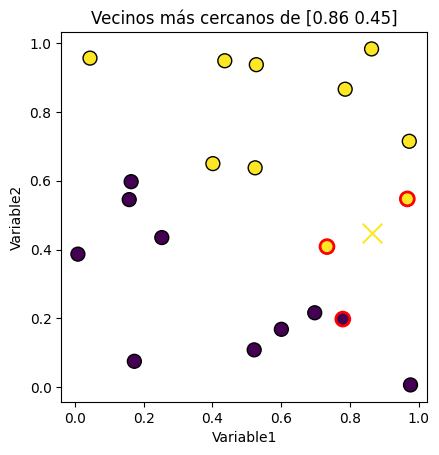

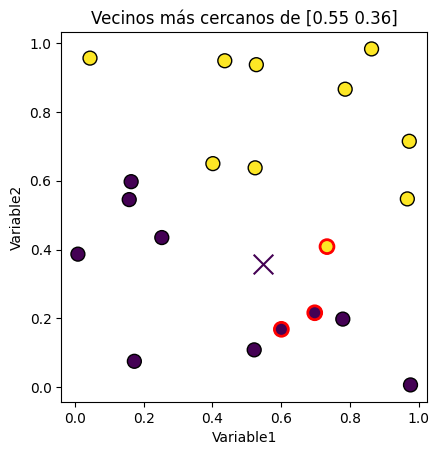

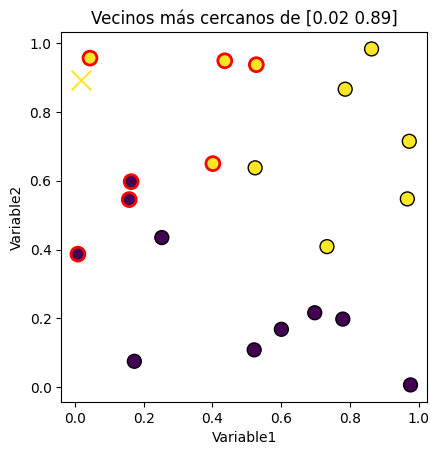

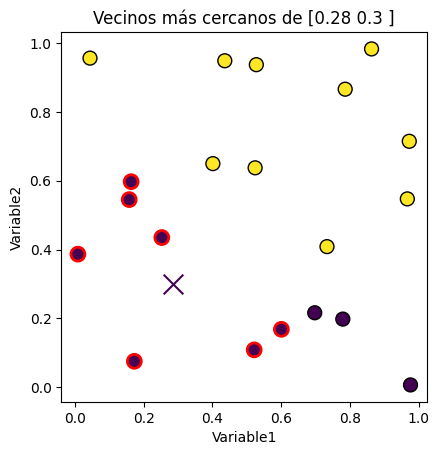

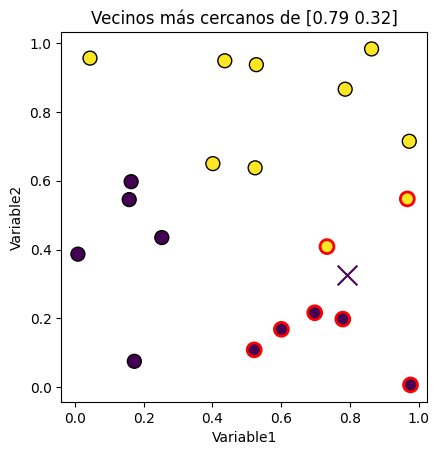

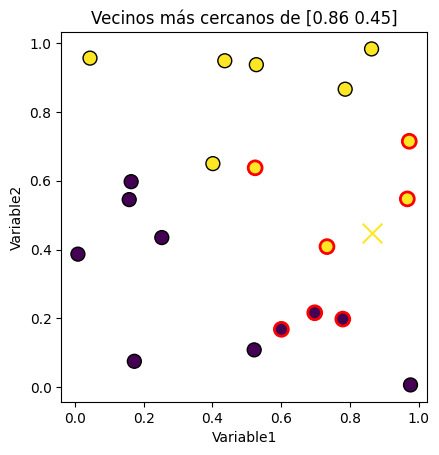

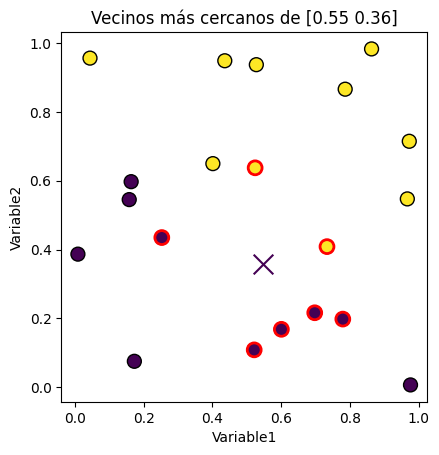

,0,1,pred_class
0,0.017490,0.891573,1
1,0.284861,0.298976,0
2,0.792034,0.324471,0
3,0.864710,0.447513,1
4,0.548230,0.357172,0


In [52]:
# We will assume that the closest neighbors will be more similar to the example we want to classify than further ones.

#First we load the data:
 
df_test = pd.read_csv('datos/datos01_test.csv')

# We separate variables(x) from labels (y)
X_test = df_test[['Variable1', 'Variable2']]

#Now we compute the likeness between the new example and the existing data
plt.figure(figsize=(5, 5))

# We paint the trainig set first.
plt.scatter(df['Variable1'], 
            df['Variable2'], 
            c=df['Clase'], 
            s=100, 
            label='Training')

# Now we paint the validation test
plt.scatter(df_test['Variable1'], 
            df_test['Variable2'], 
            color='red', 
            marker='x', # we make them appear as crosses instead of points to enhance differentitation
            s=150, 
            label='Test')

plt.title('datos01_train + datos01_test', family='monospace')
plt.xlabel('Variable1') 
plt.ylabel('Variable2') 

# Incluir leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


#APPLYING K=3 NEAREST NEIGHBORS.-> WE DONT NEED TO SPECIFY THAT K=3 BECAUSE ITS SET AS A DEFAULT VALUE.
resultados_k3 = aplicar_kNN_datos_nuevos(X_test.values, X.values, y.values) #We apply the algorithm to the validation data.
resultados_k3

#APPLYING =7 NEAREST NEIGHBORS. 
resultados_k7= aplicar_kNN_datos_nuevos(X_test.values, X.values, y.values,7) #We apply the algorithm to the validation data.
resultados_k7

### Using Sklearn


In [54]:
from sklearn.neighbors import KNeighborsClassifier

# We instantiate a new KNeighborsClassifier object that will represent our model
modelo = KNeighborsClassifier(n_neighbors=3)
# then , we adjust the model to the training data 
modelo.fit(X, y)

#Now , we can say our model has been trained. It's time for testing.
# We do that by making our model classify unknown data 
modelo.predict(X_test)

#in case we would like to see the probabilty each element has to belong to one class or another..
#modelo.predict_proba(X_test)


#results are given inside an array of vectors.

#IN ORDER TO SEE WHICH PARAMETERS ARE BEING USED TO TRAIN THE MODEL: 
#modelo.get_params()
"""
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',


array([0., 0., 0., 1., 0.])

In [ ]:
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2, 
 'weights': 'uniform'}
"""